In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

%config InlineBackend.figure_format = 'retina'

import matplotlib.dates as dates
import matplotlib.ticker as ticker
from matplotlib import markers

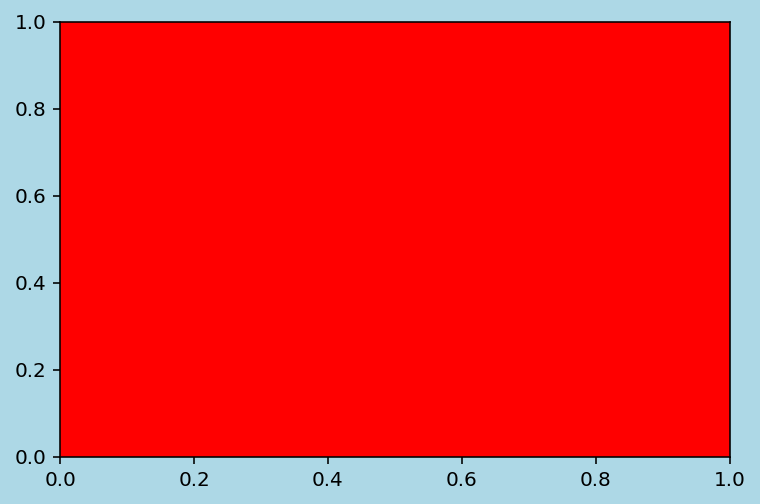

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
fig.set(facecolor='lightblue')
ax.set(facecolor='red')
plt.show()

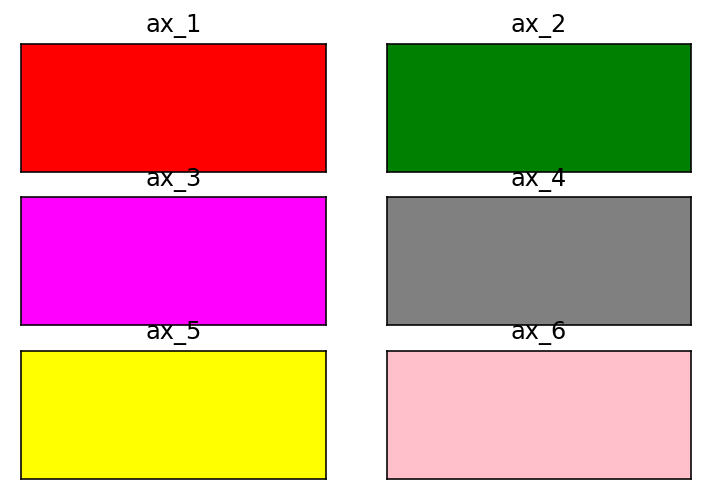

In [8]:
fig = plt.figure()

ax_1 = fig.add_subplot(3, 2, 1)
ax_1.set(facecolor='red', title='ax_1', xticks=[], yticks=[])

ax_2 = fig.add_subplot(3, 2, 2)
ax_2.set(facecolor='green', title='ax_2', xticks=[], yticks=[])

ax_3 = fig.add_subplot(3, 2, 3)
ax_3.set(facecolor='magenta', title='ax_3', xticks=[], yticks=[])

ax_4 = fig.add_subplot(3, 2, 4)
ax_4.set(facecolor='grey', title='ax_4', xticks=[], yticks=[])

ax_5 = fig.add_subplot(3, 2, 5)
ax_5.set(facecolor='yellow', title='ax_5', xticks=[], yticks=[])

ax_6 = fig.add_subplot(3, 2, 6)
ax_6.set(facecolor='pink', title='ax_6', xticks=[], yticks=[])

plt.show()

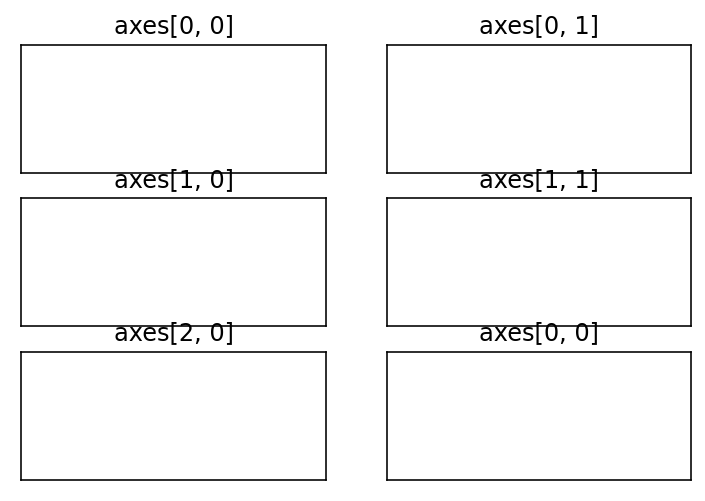

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=2)
axes[0, 0].set(title='axes[0, 0]')
axes[0, 1].set(title='axes[0, 1]')
axes[1, 0].set(title='axes[1, 0]')
axes[1, 1].set(title='axes[1, 1]')
axes[2, 0].set(title='axes[2, 0]')
axes[2, 1].set(title='axes[0, 0]')

for ax in axes.flat:
    ax.set(xticks=[], yticks=[])
plt.show()

In [17]:
cars = pd.read_csv('/home/tigran/Downloads/code/Data/monthly_car_sales.csv', header=0, index_col=0, parse_dates=True)\
.squeeze('columns')

In [18]:
cars.head()

Month
1960-01-01     6550
1960-02-01     8728
1960-03-01    12026
1960-04-01    14395
1960-05-01    14587
Name: Sales, dtype: int64

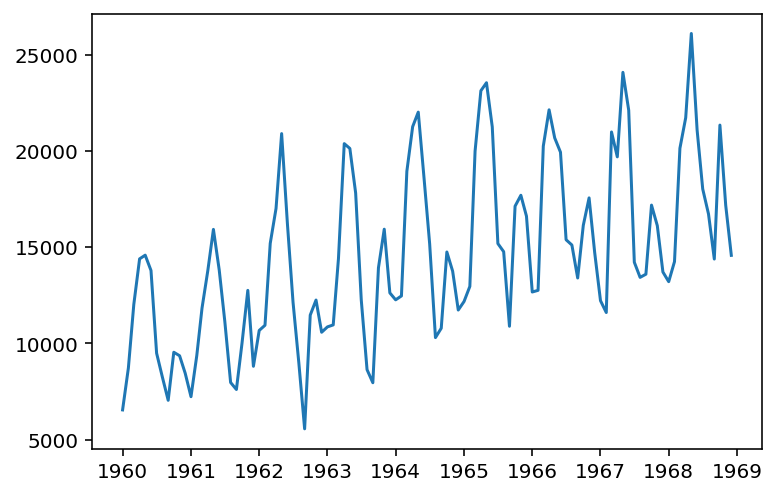

In [19]:
fig, ax = plt.subplots()
ax.plot(cars)
plt.show()

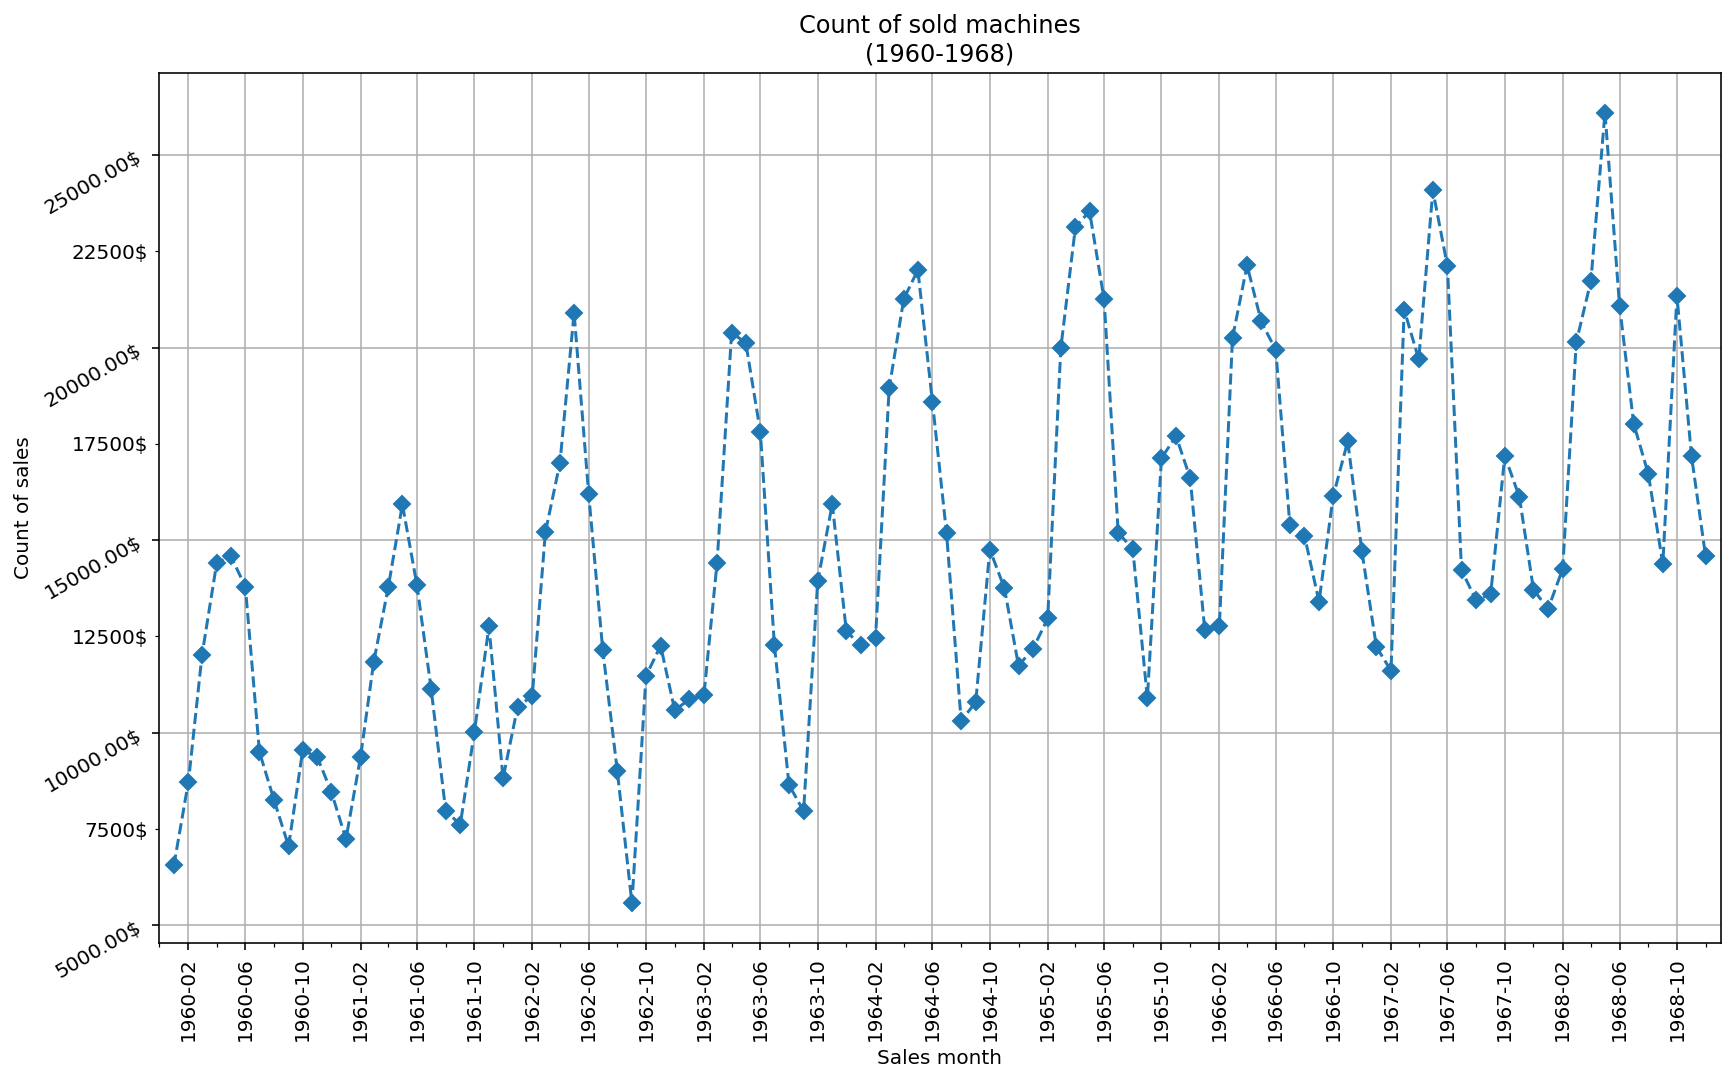

In [20]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(cars, marker='D', linestyle='--')
ax.set_title('Count of sold machines\n' + '(1960-1968)')
ax.margins(x=0.01)
ax.tick_params(axis='x', labelrotation=90)
ax.tick_params(axis='y', labelrotation=30)

ax.yaxis.set_major_locator(ticker.MultipleLocator(5000))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(2500))

ax.xaxis.set_major_locator(dates.MonthLocator(interval=4))
ax.xaxis.set_minor_locator(dates.MonthLocator(interval=2))

ax.yaxis.set_minor_formatter(ticker.FormatStrFormatter('%1.0f$'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%1.2f$'))

ax.grid()
ax.set_xlabel('Sales month')
ax.set_ylabel('Count of sales')
plt.show()

In [21]:
labels = ['Python', 'C++', 'Ruby', 'Java']
sizes = [215, 130, 245, 210]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0, 0)


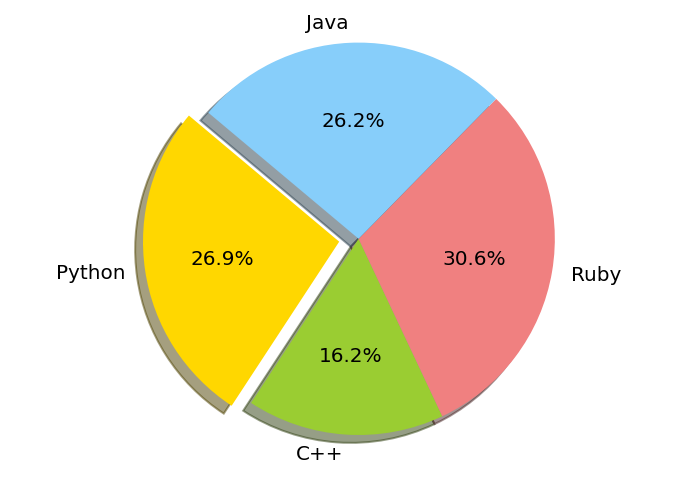

In [23]:
plt.pie(x=sizes,
       explode=explode,
       labels=labels,
       colors=colors,
       autopct='%1.1f%%',
       shadow=True,
       startangle=140)
plt.axis('equal')
plt.show()

In [24]:
data = pd.read_csv('/home/tigran/Downloads/code/Data/Visualizations.csv', encoding='cp1251', sep=';')
data.head()

,возраст,образование,стаж,проживание,доход,статус,дефолт
0,41,незак. высшее,17,12,176,постоянный,да
1,27,неполное среднее,10,6,31,постоянный,нет
2,40,среднее,15,14,55,постоянный,нет
3,41,среднее,15,14,120,постоянный,нет
4,24,среднее специальное,2,0,28,постоянный,да


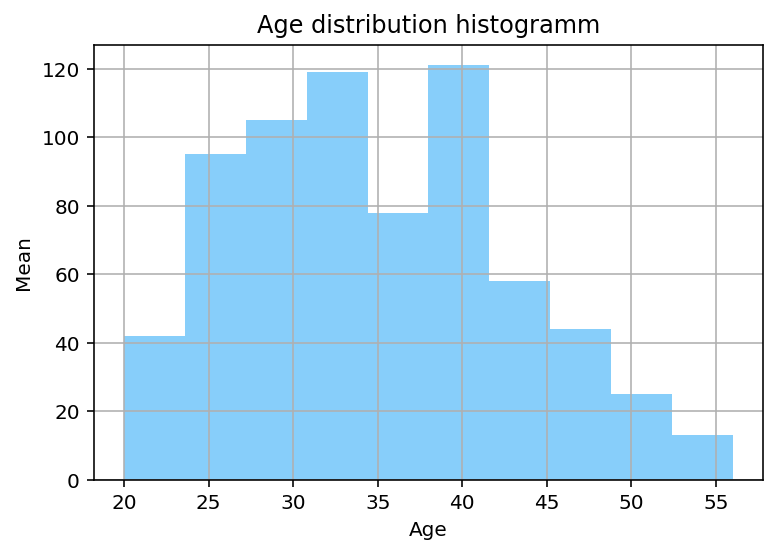

In [25]:
plt.hist(x=data['возраст'], color='lightskyblue')
plt.title('Age distribution histogramm')
plt.grid()
plt.xlabel('Age')
plt.ylabel('Mean')
plt.show()

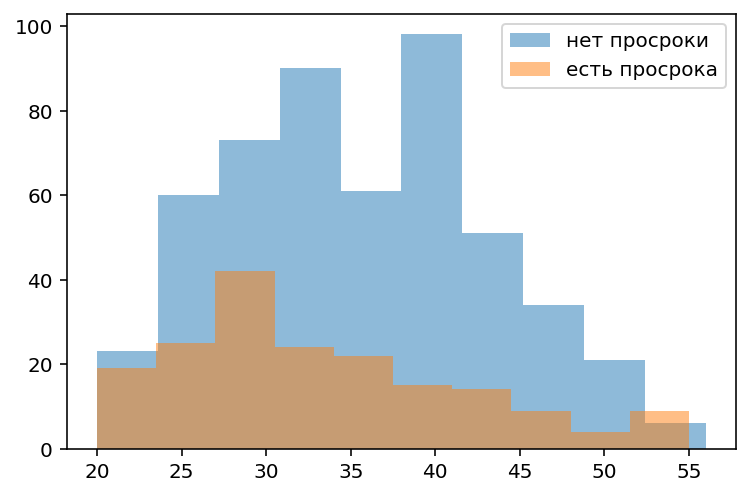

In [26]:
age_by_good = data[(data['дефолт'] == 'нет')]['возраст']
age_by_bad = data[(data['дефолт'] == 'да')]['возраст']

plt.hist(age_by_good, alpha=0.5, label='нет просроки')
plt.hist(age_by_bad, alpha=0.5, label='есть просрока')
plt.legend(loc='upper right')
plt.show()

In [27]:
d = dict(data['образование'].value_counts())
d

{'среднее': 283,
 'среднее специальное': 198,
 'высшее': 163,
 'неполное среднее': 34,
 'незак. высшее': 22}

In [28]:
ed_labels = [k for k in d.keys()]
ed_labels

['среднее',
 'среднее специальное',
 'высшее',
 'неполное среднее',
 'незак. высшее']

In [29]:
ed_counts = [v for v in d.values()]
ed_counts

[283, 198, 163, 34, 22]

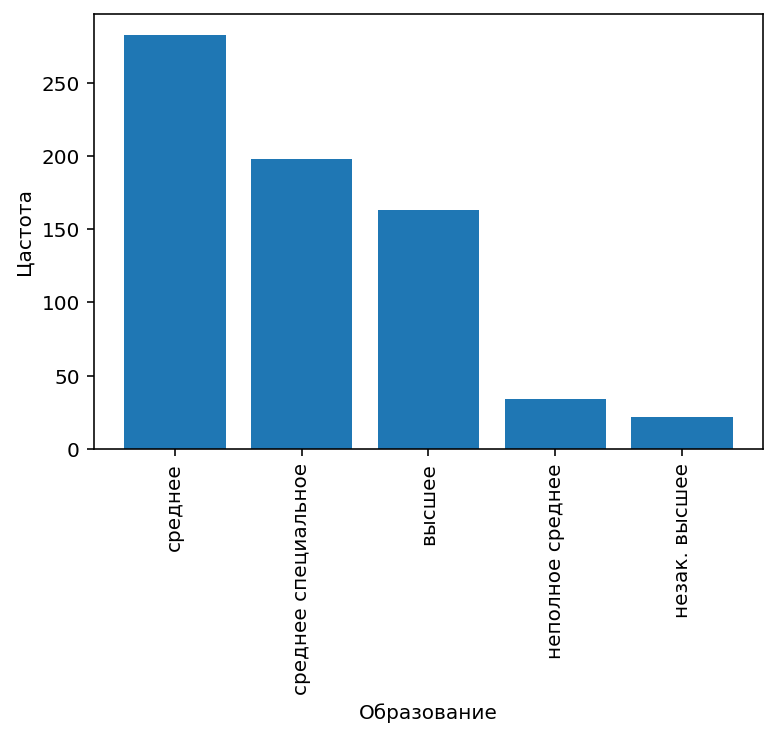

In [32]:
plt.bar(x=ed_labels, height=ed_counts)
plt.xlabel('Образование')
plt.ylabel('Цастота')
plt.xticks(rotation=90)
plt.show()

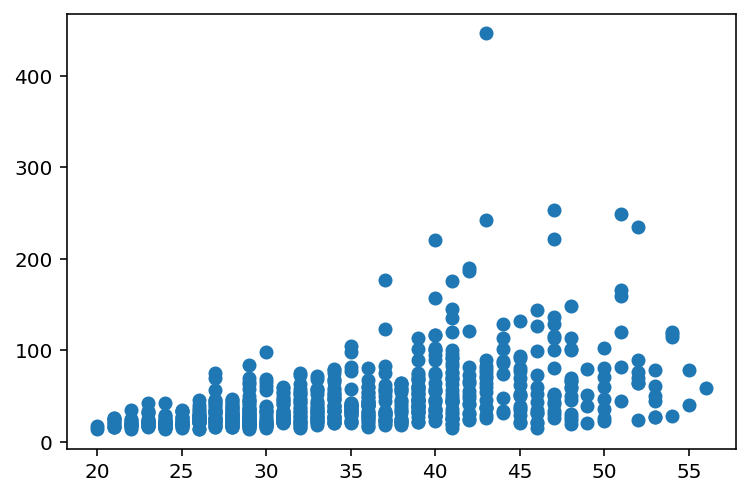

In [33]:
plot = plt.scatter(x=data['возраст'], y=data['доход'])


In [34]:
import seaborn as sns

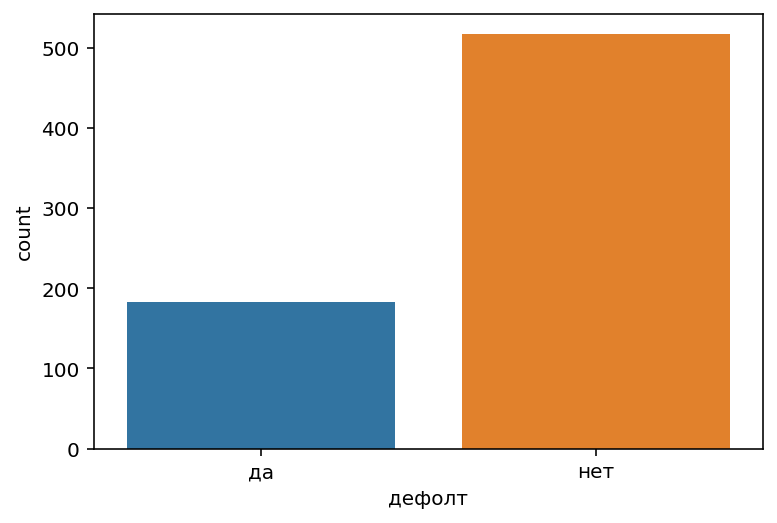

In [36]:
ed_counts = data['образование'].value_counts()
d = dict(ed_counts)
ed_labels = [k for k in d.keys()]
plot = sns.countplot(x=data['дефолт'])


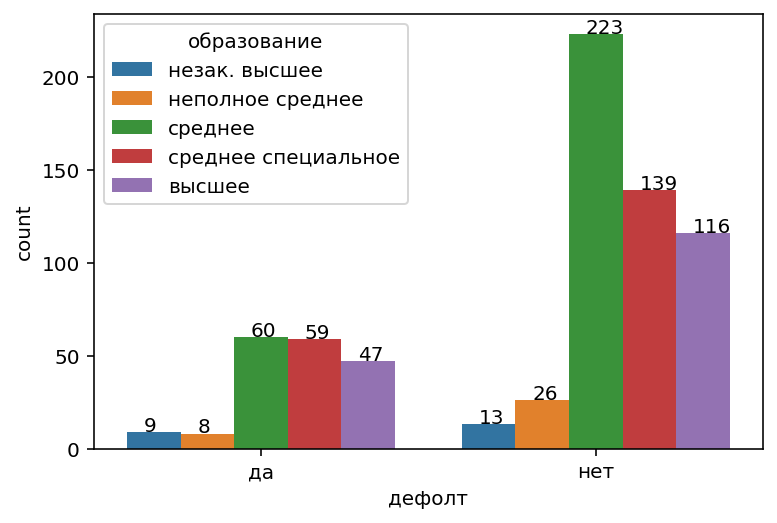

In [38]:
plot = sns.countplot(x=data['дефолт'], hue=data['образование'])
for p in plot.patches:
    plot.annotate(text='{:1.0f}'.format(p.get_height()), xy=(p.get_x() + 0.05, p.get_height()+ 0.5))

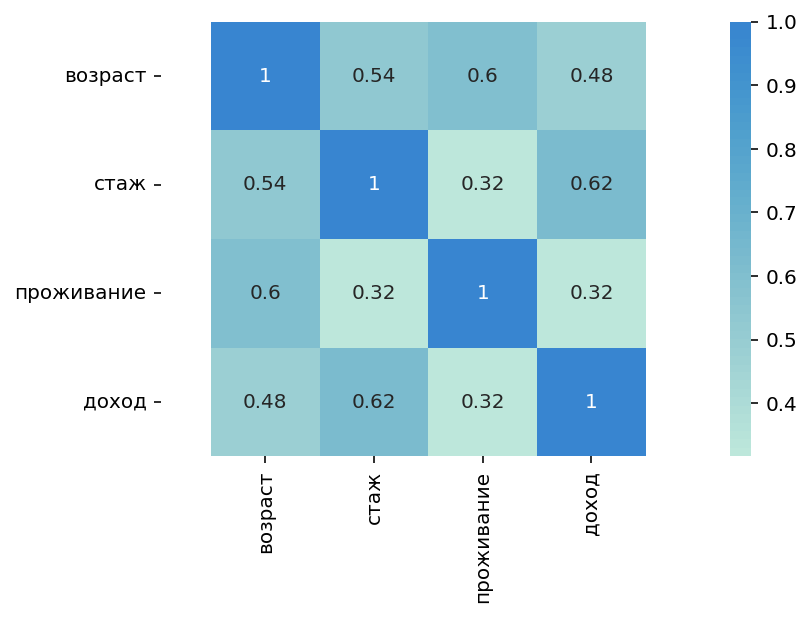

In [40]:
plot = sns.heatmap(data=data.corr(), annot=True, center=2)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.axis('equal')
plt.show()